# **Trabajo Práctico N°1 - Procesamiento del Lenguaje Natural**
## Integrantes:
*   César Donnarumma
*   Lucas Demarré
*   Gustavo Fontana



## **Ejercicio 1:**
*Construir un dataset haciendo web scraping de páginas web de su elección.*

*   *Definir 4 categorías de noticias/artículos.*
*   *Para cada categoría, extraer los siguientes datos de 10 noticias diferentes:*
    - *url (sitio web donde se publicó el artículo)*
    - *título (título del artículo)*
    - *texto (contenido del artículo)*

**Categorias (reseñas de):**

- Videojuegos
- Peliculas
- Musica
- Hoteles

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings

In [ ]:
videojuegos = {
                0: "https://lavidaesunvideojuego.com/2023/10/18/resena-resident-evil-4-separate-ways-mucho-mas-que-un-simple-dlc/",
                1: 'https://lavidaesunvideojuego.com/2023/10/20/resena-crymachina-en-verdad-es-necesario-salvar-la-humanidad/',
                2: 'https://lavidaesunvideojuego.com/2023/10/09/resena-forza-motorsport-simulacion-en-su-maxima-expresion/',
                3: 'https://lavidaesunvideojuego.com/2023/10/10/assassins-creed-mirage-un-desierto-o-un-oasis/',
                4: 'https://lavidaesunvideojuego.com/2023/10/13/bilkins-folly-resena-un-desafio-digno-de-un-caza-tesoros/',
                5: 'https://lavidaesunvideojuego.com/2023/10/05/resena-truck-driver-the-american-dream-se-el-conductor-de-tu-propia-vida/',
                6: 'https://lavidaesunvideojuego.com/2023/10/02/resena-ea-sports-fc-24-un-nuevo-comienzo/',
                7: 'https://lavidaesunvideojuego.com/2023/09/13/age-of-empires-iv-se-lanza-a-la-conquista-de-la-series-x%e2%94%82s/',
                8: 'https://lavidaesunvideojuego.com/2023/09/11/resena-its-a-wrap-luces-camara-corten/',
                9: 'https://lavidaesunvideojuego.com/2023/09/07/resena-monochrome-mobius-rights-and-wrongs-forgotten-no-dejes-todo-para-el-final/',
                10: 'post-content clear',
                11: 'videojuegos'
              }

peliculas = {
              0: 'https://www.fotogramas.es/peliculas-criticas/a45579665/mi-otro-jon-critica-pelicula/',
              1: 'https://www.fotogramas.es/peliculas-criticas/a43950509/killers-of-the-flower-moon-critica-pelicula-scorsese-dicaprio-deniro/',
              2: 'https://www.fotogramas.es/peliculas-criticas/a45579872/el-reino-animal-critica-pelicula/',
              3: 'https://www.fotogramas.es/peliculas-criticas/a45503223/me-he-hecho-viral-critica-pelicula/',
              4: 'https://www.fotogramas.es/peliculas-criticas/a45503222/al-otro-lado-del-rio-y-entre-los-arboles-critica-pelicula/',
              5: 'https://www.fotogramas.es/peliculas-criticas/a45503811/critica-de-orlando-mi-biografia-politica/',
              6: 'https://www.fotogramas.es/peliculas-criticas/a45442429/exorcista-creyente-critica-pelicula-polemica/',
              7: 'https://www.fotogramas.es/peliculas-criticas/a45298263/critica-chinas-arantxa-echevarria-pelicula/',
              8: 'https://www.fotogramas.es/peliculas-criticas/a45238980/saw-x-critica-pelicula/',
              9: 'https://www.fotogramas.es/peliculas-criticas/a43975191/cerrar-los-ojos-critica-pelicula-victor-erice/',
              10: 'article-body-content article-body standard-body-content css-1vzhgcw ewisyje7',
              11: 'peliculas'
}

musica = {    0: 'https://rockentreamigos.com/2019/10/25/grupo-theatre-of-tragedy-discolast-curtain-call-ano2011/',
              1: 'https://rockentreamigos.com/2020/09/25/grupo-mercurio-disco-re-genesis-sellothe-fish-factory-ano2018/',
              2: 'https://rockentreamigos.com/2020/10/06/grupoiron-maiden-discosomewhere-in-time-ano1987-selloemi/',
              3: 'https://rockentreamigos.com/2023/03/10/grupobring-me-the-horizon-discosempiternal-sellorca-records-ano2013-nota95/',
              4: 'https://rockentreamigos.com/2023/05/11/grupo-cultes-des-ghoules-disco-henbane-or-sonic-compendium-of-the-black-arts-2013-sello-under-the-sign-of-garazel-productions/',
              5: 'https://rockentreamigos.com/2023/07/26/40-anos-del-inicio-de-un-genero-el-killem-all-de-metallica/',
              6: 'https://rockentreamigos.com/2019/09/05/grupo-judas-priest-disco-stained-class-ano-1980/',
              7: 'https://rockentreamigos.com/2023/08/28/grupoiron-maiden-disco-a-matter-of-life-and-death-selloemi-ano2006/',
              8: 'https://rockentreamigos.com/2023/09/04/rea-194-desenterrando-tesoros-viper-brazil-evolution-y-su-vida/',
              9: 'https://rockentreamigos.com/2023/10/18/grupo-queensryche-disco-promised-land-sello-emi-fecha-de-publicacion-18-de-octubre-de-1994/',
              10: 'entry-content',
              11: 'musica'
}


hoteles = {
            0: 'https://www.unmundopequenio.com/resena-la-merced-del-alto-cachi/',
            1: 'https://www.unmundopequenio.com/resena-hotel-apraxin-san-petersburgo/',
            2: 'https://www.unmundopequenio.com/resena-gia-vien-hotel-ho-chi-minh-city/',
            3: 'https://www.unmundopequenio.com/havana-hotel-el-cairo/',
            4: 'https://www.unmundopequenio.com/resena-balcon-de-la-plaza-salta/',
            5: 'https://www.unmundopequenio.com/resena-tara-place-bangkok/',
            6: 'https://www.unmundopequenio.com/resena-jj-bungalows-phi-phi/',
            7: 'https://www.unmundopequenio.com/resena-travelodge-fort-myers/',
            8: 'https://www.unmundopequenio.com/resena-comfort-inn-long-island-city-nueva-york/',
            9: 'https://www.unmundopequenio.com/albergo-enrica-hotel-en-roma/',
            10: 'entry-content',
            11: 'hoteles'
}

urls = [videojuegos, peliculas, musica, hoteles]

def web_scrapping(url, clase):

  ''' Descarga, extrae y retorna de las paginas web de la lista "urls" los titulos y textos de los respectivos articulos'''


  response = requests.get(url, verify=True) #LO PASÉ A TRUE PARA QUE VERIFIQUE CREDENCIALES Y NO MUESTRE LA ADVERTENCIA EN EL OTRO BLOQUE

  soup = BeautifulSoup(response.text, 'html.parser')

  titulo = soup.find('h1')

  texto = soup.find('div', {'class': clase})

  texto = texto.find_all(['p', 'h2'])



  parrafo = '\n'.join(par.text for par in texto)

  return titulo.text, parrafo

In [ ]:
# Lista de columnas (vacias) para crear luego un df
data = {'url': [], 'titulo': [], 'texto': [], 'categoria': []}

# DataFrame con columnas vacio
dataset = pd.DataFrame(data)

warnings.filterwarnings("ignore", category=FutureWarning) #AGREGUE ESTE IGNORE PARA NO MOSTRAR LAS ADVERTENCIAS DE PD

# Iteramos sobre lista de urls
for categoria in urls:
  # Tomamos cada elemento de cada categoria, a excepcion de los dos ultimos que contienen: la clase de la etiqueta que contiene el cuerpo del artiuclo
  # y el nombre de la categoria
  for i in range( len(categoria) - 2 ):

    # Extraemos el titulo y el articulo en si
    titulo, texto = web_scrapping(categoria[i], categoria[10])
    # Extraemos el nombre de la categoria
    nombre_categoria = categoria[11]

    # Creamos un diccionario con los valores de la nueva fila
    nueva_fila = {'url': categoria[i], 'titulo': titulo, 'texto': texto, 'categoria': nombre_categoria}

    # Lo agregamos al df
    dataset = dataset.append(nueva_fila, ignore_index=True)

In [ ]:
# Exportamos el df como .csv
dataset.to_csv('articulos.csv', index=False)

## **Ejercicio 2:**
*Utilizando los datos de título y categoría del dataset del ejercicio anterior, entrenar un modelo de clasificación de noticias en categorías específicas.*

### Con TF-IDF:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import numpy as np

Limpieza de los datos:

In [ ]:
# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

# Copiamos lo que nos interesa del dataset
datos = dataset[['titulo', 'categoria']].copy()

# Codificacion de variable independiente
labels = { "videojuegos": 0, "peliculas": 1, "musica": 2,
          "hoteles": 3}

# Mapeo de categorica a cuantiativa
datos['categoria'] = datos['categoria'].map(labels)

# Eliminamos signos de puntuacion
datos['titulo'] = datos['titulo'].str.replace('[^\w\s]', '')

# Convertimos a minusculas
datos['titulo'] = datos['titulo'].str.lower()

# Eliminamos acentos para homogeneizar el texto
import unicodedata

def remove_accents(input_str):
  nfkd_form = unicodedata.normalize('NFKD', input_str)
  return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

datos['titulo'] = datos['titulo'].apply(lambda titulo: remove_accents(titulo))

# Eliminamos algunas palabras que pueden ser comunes a todos los titulos a raiz de ver en un primer intento que tenian demasiada influencia,
# cuando en realidad son palabras que no tienen nada que ver con ninguna de las categorias mas alla del tipo de texto del que se trata
datos['titulo'] = datos['titulo'].str.replace('resena', '').str.replace('critica', '')

X = datos['titulo']
y = datos['categoria']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vectorizacion y Regresion Logistica:

In [ ]:
# Vectorización de los textos con eliminación de palabras vacías
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X_vectorized = vectorizer.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=45)

# Creación y entrenamiento del modelo de Regresión Logística
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Evaluacion del modelo:

In [ ]:
# Metricas de Train:
y_pred_train = modelo_LR.predict(X_train)
acc_LR = accuracy_score(y_train, y_pred_train)
report_LR = classification_report(y_train, y_pred_train, zero_division=1)
conf_matrix = confusion_matrix(y_train, y_pred_train)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)
print("Matriz de Confusión:")
print(conf_matrix)

Precisión Regresión Logística: 1.0
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Matriz de Confusión:
[[6 0 0 0]
 [0 8 0 0]
 [0 0 9 0]
 [0 0 0 9]]


In [ ]:
# Metricas de Test:
y_pred_test = modelo_LR.predict(X_test)
acc_LR = accuracy_score(y_test, y_pred_test)
report_LR = classification_report(y_test, y_pred_test, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)
print("Matriz de Confusión:")
print(conf_matrix)

Precisión Regresión Logística: 0.25
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         1
           3       0.33      1.00      0.50         1

    accuracy                           0.25         8
   macro avg       0.40      0.50      0.23         8
weighted avg       0.57      0.25      0.11         8

Matriz de Confusión:
[[0 1 3 0]
 [0 0 0 2]
 [0 0 1 0]
 [0 0 0 1]]


Observando las metricas podemos ver que el modelo se ajusto demasiado bien a los datos de entrenamiento pero no puede generalizar con los datos de test.

Predicciones:

In [ ]:
# Codificacion de variable independiente
labels_2 = { 0: "videojuegos", 1: "peliculas" , 2: "musica",
          3: "hoteles"}

# Definimos una lista de frases para clasificar
nuevas_frases = [
    "Reseña Killer Frequency: Desata el terror de los años 80",
    'Reseña LEGO 2K Drive, construye, corre y disfruta',
    'Reseña Cannon Dancer: Osman, un poco de nostalgia',
    "Reseña: Hotel Audran (París)",
    "Reseña: Nefertiti Hotel (Luxor)",
    'Crítica de ‘Divertimento’, una ‘feel-good movie’ francesa basada en hechos reales',
    'Crítica de El poder del perro',
    'Crítica de Parásitos',
    'Banda: MORS SUBITA Disco: Origin of Fire Sello: Out of Line Music Año: 2023',
    'Grupo:MERCENARY. Disco:“Soundtrack for the End Times”. Sello:NoiseArt Records. Año:2023.',
    'Banda: RED CAIN Disco: NÄE´BLISS Sello: Autoeditado Año: 2023'
]

# Guardamos los titulos que vamos a probar en un nuevo df
nuevos_datos = pd.DataFrame({'titulo': nuevas_frases})

# Realizamos la misma limpieza que hicimos a los datos de entrenamiento y test:

# Eliminamos signos de puntuacion
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.replace('[^\w\s]', '')

# Convertimos a minusculas
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.lower()

# Eliminamos los acentos
nuevos_datos['titulo'] = nuevos_datos['titulo'].apply(lambda titulo: remove_accents(titulo))

# Eliminamos algunas palabras que pueden ser comunes a todos los titulos
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.replace('resena', '').str.replace('critica', '')

# Transformamos las nuevas frases usando el vectorizador que usamos para entrenar el modelo
nuevas_frases_vectorizadas = vectorizer.transform(nuevos_datos['titulo'])

# Usamos el modelo entrenado para predecir las etiquetas de las nuevas frases
etiquetas_predichas = modelo_LR.predict(nuevas_frases_vectorizadas)

# Imprimimos las etiquetas predichas
for i, etiqueta in enumerate(etiquetas_predichas):
    print(f"La frase '{nuevas_frases[i]}' pertenece a la categoría: {labels_2[etiqueta]}")

La frase 'Reseña Killer Frequency: Desata el terror de los años 80' pertenece a la categoría: musica
La frase 'Reseña LEGO 2K Drive, construye, corre y disfruta' pertenece a la categoría: hoteles
La frase 'Reseña Cannon Dancer: Osman, un poco de nostalgia' pertenece a la categoría: hoteles
La frase 'Reseña: Hotel Audran (París)' pertenece a la categoría: hoteles
La frase 'Reseña: Nefertiti Hotel (Luxor)' pertenece a la categoría: hoteles
La frase 'Crítica de ‘Divertimento’, una ‘feel-good movie’ francesa basada en hechos reales' pertenece a la categoría: hoteles
La frase 'Crítica de El poder del perro' pertenece a la categoría: hoteles
La frase 'Crítica de Parásitos' pertenece a la categoría: hoteles
La frase 'Banda: MORS SUBITA Disco: Origin of Fire Sello: Out of Line Music Año: 2023' pertenece a la categoría: musica
La frase 'Grupo:MERCENARY. Disco:“Soundtrack for the End Times”. Sello:NoiseArt Records. Año:2023.' pertenece a la categoría: musica
La frase 'Banda: RED CAIN Disco: NÄE´

Grafico de palabras que mas influyen en el modelo

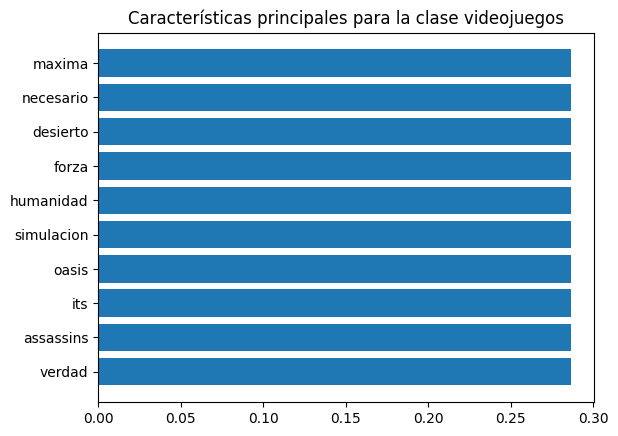

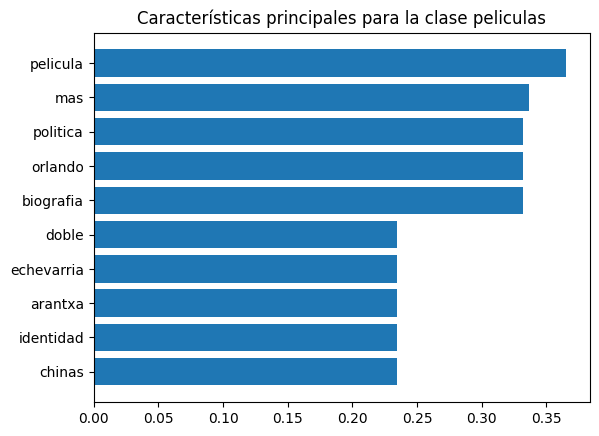

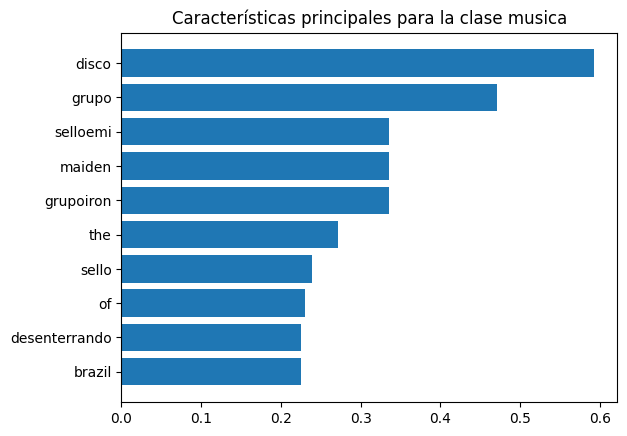

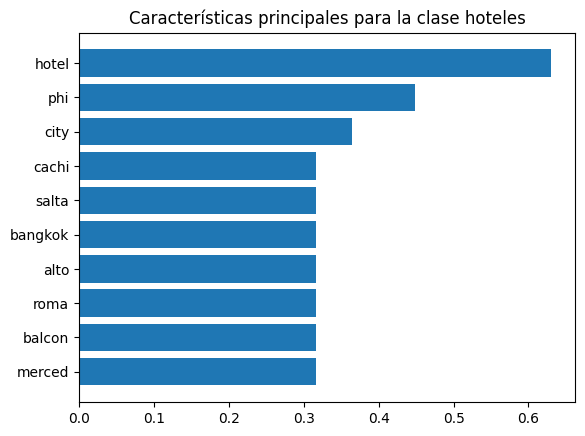

In [ ]:
import matplotlib.pyplot as plt

# Obtén los nombres de las características y los coeficientes
feature_names = vectorizer.get_feature_names_out()
coef = modelo_LR.coef_

# Visualiza los coeficientes más importantes para cada clase
num_top_features = 10
for i, label in enumerate(labels_2.values()):
    top_features_idx = np.argsort(coef[i])[-num_top_features:]
    top_features_names = [feature_names[j] for j in top_features_idx]
    top_features_coef = coef[i][top_features_idx]

    plt.figure()
    plt.barh(top_features_names, top_features_coef)
    plt.title(f'Características principales para la clase {label}')
    plt.show()

Las metricas no dan para nada bien, pero es de esperar debido a la poca cantidad de datos que tenemos. En el grafico que muestra las palabras que mas influyen al modelo, en videojuegos se pueden ver palabras como maxima, necesario y desierto, que seguramente en un dataset de tamaño considerable de titulos no aparecerian.

### Con BERT:

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.3 MB/s eta 0:00:00


In [ ]:
import nltk
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Cargar el tokenizador y modelo preentrenado de BERT para español
model_name = 'dccuchile/bert-base-spanish-wwm-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embeddings(texts):
    """Función para obtener los embeddings de BERT para una lista de textos."""
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Usamos el embedding del token [CLS] como la representación del texto
        embeddings.append(outputs.last_hidden_state[0][0].numpy())
    return np.array(embeddings)

# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorizacion y Regresion Logistica:

In [ ]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Obtenemos los embeddings de BERT para los conjuntos de entrenamiento y prueba
X_train_vectorized = get_bert_embeddings(X_train)
X_test_vectorized = get_bert_embeddings(X_test)

# Creación y entrenamiento del modelo de Regresión Logística
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

Evaluacion del modelo

In [ ]:
# Metricas Train:
y_pred_train_LR = modelo_LR.predict(X_train_vectorized)
acc_LR = accuracy_score(y_train, y_pred_train_LR)
report_LR = classification_report(y_train, y_pred_train_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

Precisión Regresión Logística: 1.0
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [ ]:
# Metricas de Test:
y_pred_test_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_test_LR)
report_LR = classification_report(y_test, y_pred_test_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

Precisión Regresión Logística: 1.0
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Llama la atencion lo demasiado bien que dieron las metricas en ambos conjuntos.

Predicciones

In [ ]:
new_phrases_vectorized = get_bert_embeddings(nuevos_datos['titulo'])

# Haciendo predicciones con el modelo entrenado
new_predictions = modelo_LR.predict(new_phrases_vectorized)

# Mostrando las predicciones junto con las frases
for text, label in zip(nuevas_frases, new_predictions):
    print(f"Texto: '{text}'")
    print(f"Clasificación predicha: {labels_2[label]}\n")

Texto: 'Reseña Killer Frequency: Desata el terror de los años 80'
Clasificación predicha: videojuegos

Texto: 'Reseña LEGO 2K Drive, construye, corre y disfruta'
Clasificación predicha: videojuegos

Texto: 'Reseña Cannon Dancer: Osman, un poco de nostalgia'
Clasificación predicha: videojuegos

Texto: 'Reseña: Hotel Audran (París)'
Clasificación predicha: hoteles

Texto: 'Reseña: Nefertiti Hotel (Luxor)'
Clasificación predicha: hoteles

Texto: 'Crítica de ‘Divertimento’, una ‘feel-good movie’ francesa basada en hechos reales'
Clasificación predicha: peliculas

Texto: 'Crítica de El poder del perro'
Clasificación predicha: hoteles

Texto: 'Crítica de Parásitos'
Clasificación predicha: hoteles

Texto: 'Banda: MORS SUBITA Disco: Origin of Fire Sello: Out of Line Music Año: 2023'
Clasificación predicha: musica

Texto: 'Grupo:MERCENARY. Disco:“Soundtrack for the End Times”. Sello:NoiseArt Records. Año:2023.'
Clasificación predicha: musica

Texto: 'Banda: RED CAIN Disco: NÄE´BLISS Sello: Auto

A la hora de hacer predicciones con los nuevos titulos funciona mejor que TF-IDF al parecer, pero no deja de tener errores, sobre todo con los hoteles y las peliculas

Conclusiones: No es posible hacer un buen clasificador con tan pocos datos.

## **Ejercicio 3:**
*Para cada categoría, realizar las siguientes tareas:*

*   *Procesar el texto mediante recursos de normalización y limpieza.*
*   *Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las mismas mediante una nube de palabras.*

*Escribir un análisis general del resultado obtenido.*

In [ ]:
# Leemos el csv
archivo = pd.read_csv('articulos.csv')

In [ ]:
#%%capture
#Librería para tratar los emojis
!pip install demoji
import demoji

# Descarga el conjunto de datos de emoji
demoji.download_codes()

#Librería para stopwords y frecuencias
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

# Descargar el conjunto de palabras de parada en español
nltk.download('stopwords')
nltk.download('punkt')

# Definir las palabras de parada en español
stop_words = set(stopwords.words('spanish'))

#Librería para lematización
!python -m spacy download es_core_news_sm
import es_core_news_sm

#Librería para nubes de palabras
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Para el uso de expresiones regulares
import re

In [ ]:
# Crear un diccionario para almacenar los textos por categoría
textos_por_categoria = {}

# Iterar a través de las categorías y extraer los textos correspondientes
for categoria in archivo.categoria.unique():
    # Filtrar el DataFrame para la categoría actual
    df_categoria_actual = archivo[archivo['categoria'] == categoria]

    # Extraer los textos de la categoría actual y los almacena en una lista
    textos_categoria_actual = df_categoria_actual['texto'].tolist()

    # Almacena la lista de textos en el diccionario usando la categoría como clave
    textos_por_categoria[categoria] = textos_categoria_actual

In [ ]:
# Función para eliminar stopwords de una frase
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
  return " ".join(filtered_text)

#Función para procesar el texto
def procesar_texto(textos_por_categoria):
  #Se carga la función para lematizar
  nlp = es_core_news_sm.load()

  # Creamos un objeto FreqDist para las palabras
  fdist_words = FreqDist()

  for texto in textos_por_categoria:
    #Elimino enlaces web
    texto = re.sub(r'http\S+|www\S+|\.com\b', '', texto)

    #Se quitan los emojis del texto
    sin_emojis = demoji.replace(texto,'')

    #Se quitan caracteres especiales
    sin_caracteres_especiales = re.sub(r'[^\w\s]+|\d+', '', sin_emojis)

    #Se lematiza para obtener la raíz de cada palabra
    texto_lematizado = [token.lemma_.lower() for token in nlp(sin_caracteres_especiales)]
    texto_lematizado = ' '.join(texto_lematizado)

    #Se eliminan las stopwords
    sin_stop_words = remove_stopwords(texto_lematizado)

    # Eliminar menciones a "pictwitter"
    sin_stop_words = re.sub(r'pictwitter\S*', '', sin_stop_words)

    #Se cuenta la frecuencia de las palabras
    words = word_tokenize(sin_stop_words)

    # Actualizo FreqDist
    fdist_words.update(words)

  # Se guardan el total de palabras y las frecuencias
  total_palabras = f'Total de palabras: {len(fdist_words)}'
  frecuencia = dict(fdist_words)
  return total_palabras, dict(sorted(frecuencia.items())), sin_stop_words

#Función para generear nubes de palabras
def generar_nube_palabras(categorias):
  n = 0
  plt.figure(figsize = (14,14), facecolor = None)
  for categoria in categorias:
    plt.subplot(141+n)
    wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            stopwords = None,
                            min_font_size = 10).generate(procesar_texto(textos_por_categoria[categoria])[2])
    plt.axis("off")
    plt.title(f'Categoria {categoria}',color='navy',fontweight='bold',fontsize=12, pad=15)
    plt.tight_layout(pad = 1.5)
    plt.imshow(wordcloud)
    n += 1
  plt.show()

### **Nube de palabras**

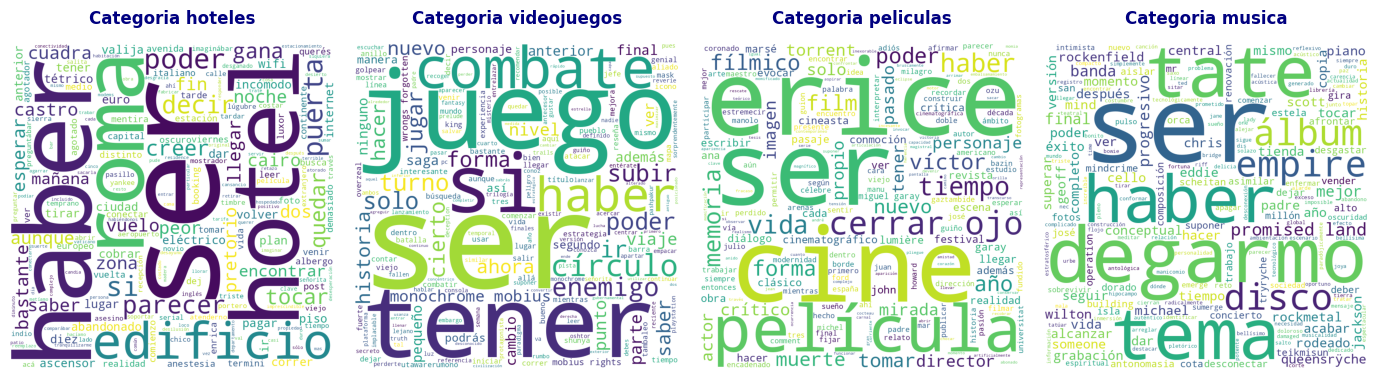

In [ ]:
generar_nube_palabras(['hoteles','videojuegos','peliculas','musica'])

### **Resultado: frecuencia de palabras**

In [ ]:
procesar_texto(textos_por_categoria['peliculas'])[:2]

In [ ]:
procesar_texto(textos_por_categoria['hoteles'])[:2]

In [ ]:
procesar_texto(textos_por_categoria['musica'])[:2]

In [ ]:
procesar_texto(textos_por_categoria['videojuegos'])[:2]

### **Conlusión:**
Luego de procesar los datos eliminando texto innecesario, caracteres especiales, emojis, etc, se obtuvo el texto que nos interesa.
A través de la nube de palabras generada por la función de ploteo, se pueden visualizar aquellas palabras mas representativas y con más frecuencia en base a su tamaño en el gráfico.
Llamando a la función que nos procesa el texto obtenemos el total de palabras y la frecuencia para cada una de ellas luego de aplicar las transformaciones. Como es de esperar ciertas palabras relacionadas a la categoria que pertenecen tienen una mayor frecuencia.
Es necesario comentar que la representatividad de ciertas palabras no se vuelve tan evidente en un conjunto tan pequeño de datos.

## **Ejercicio 4:**
*Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los títulos de las noticias de una de las categorías.
Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.*


### Librerías

Configuramos el entorno utilizando `%%capture` para evitar la sobrecarga de la consola con comandos, y procedemos a descargar todas las bibliotecas necesarias para el desarrollo de la tarea en su totalidad.

In [ ]:
# Primero preparamos el entorno en Colab
%%capture

# Todos los modelos
!pip install unidecode

from unidecode import unidecode
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Primer modelo: Promedio de Word Embeddings
!pip install spacy
!python -m spacy download en_core_web_md

import spacy
import en_core_web_md

# Segundo modelo: Universal Sentence Encoder
!pip install "tensorflow-text"
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-text
!pip install bokeh==2.4.3
!pip install simpleneighbors[annoy]
!pip install tqdm

import tensorflow_text
import bokeh
import bokeh.models
import bokeh.plotting
import os
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
import sklearn

# Tercer modelo: Doc2Vec
!pip install gensim

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Cuarto modelo: S-BERT
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable

### Implementación

#### Variables inciciales

In [ ]:
# Separamos los títulos de una categoría que elijamos
chosen_category = 'videojuegos'
data_ej4 = dataset[dataset['categoria'] == chosen_category]
titles = data_ej4['titulo']  # Solo almacenamos los títulos de dicha categoría

titles_list = []
for title in titles:
    title = re.sub(r'[!,¿¡’?]', '', title.lower()) # Eliminamos signos de exclamación, interrogación, etc. y convertimos a minúscula
    title = unidecode(title) # Eliminamos las tildes
    titles_list.append(title)  # Guardamos dentro de una lista los títulos para facilitar el manejo de los mismos

#### Primer modelo: **Promedio de Word Embeddings**

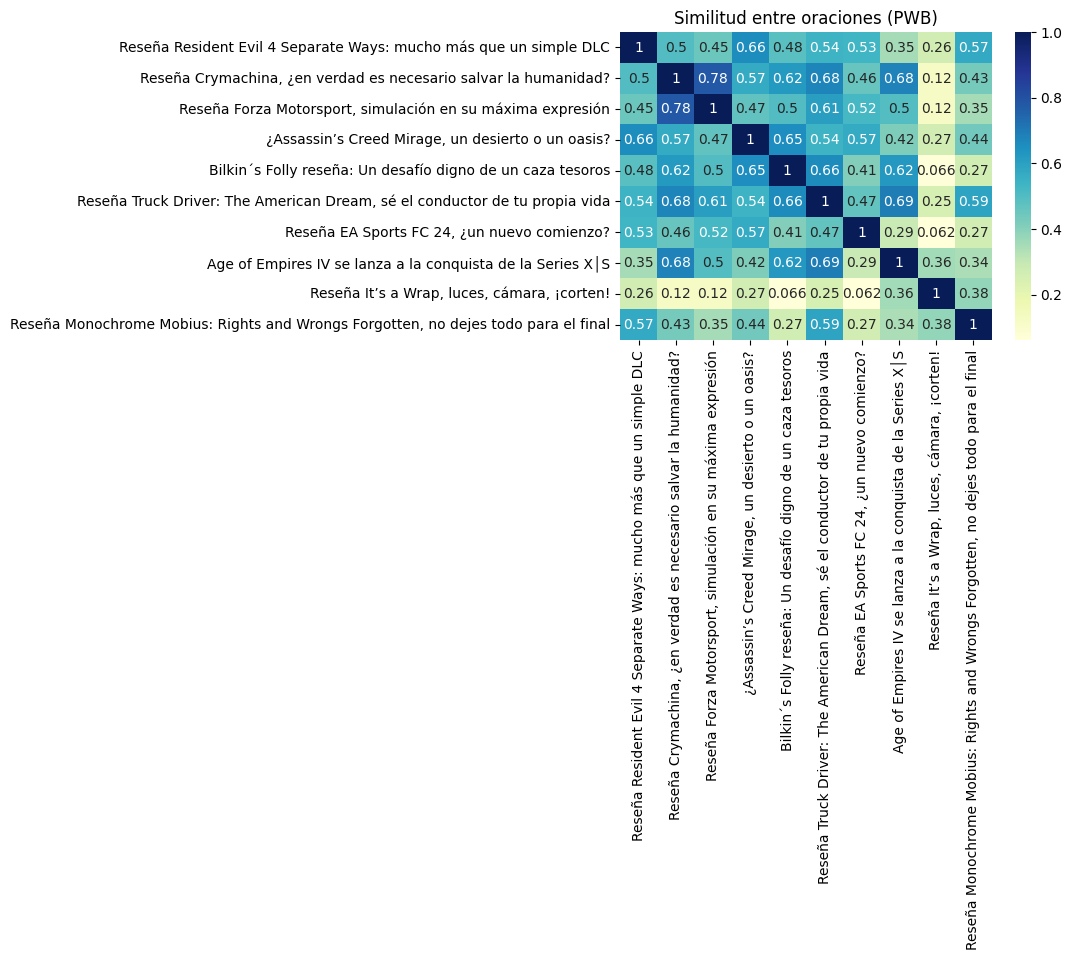

In [ ]:
# Cargamos el modelo de procesamiento de lenguaje natural
nlp = spacy.load("en_core_web_md")

# Creamos una lista para almacenar las similitudes
similarities = []

# Iteramos a través de la lista de títulos
for i in titles_list:
    row = []

    # Iteramos nuevamente a través de la lista de títulos para comparar con cada título
    for x in titles_list:
        # Calculamos la similitud entre los títulos utilizando el modelo SpaCy
        sim = nlp(i).similarity(nlp(x))

        # Agregamos el valor de similitud a la fila
        row.append(sim)

    # Agregamos la fila de similitudes a la lista de similitudes
    similarities.append(row)

# Creamos un mapa de calor de la matriz de similitud
plt.figure(figsize=(6, 4))
sns.heatmap(similarities, annot=True, xticklabels=titles, yticklabels=titles, cmap="YlGnBu")
plt.title("Similitud entre oraciones (PWB)")
plt.show()

#### Segundo modelo: **Universal Sentence Encoder (USE)**

In [ ]:
# Definición de la función para visualizar la similitud entre embeddings y etiquetas
def visualize_similarity(embeddings_1, embeddings_2, labels_1, labels_2,
                         plot_title,
                         plot_width=1200, plot_height=600,
                         xaxis_font_size='12pt', yaxis_font_size='12pt'):

  # Verificación de igual longitud de embeddings y etiquetas
  assert len(embeddings_1) == len(labels_1)
  assert len(embeddings_2) == len(labels_2)

  # Cálculo de similitud de texto basado en similitud coseno
  sim = 1 - np.arccos(
      sklearn.metrics.pairwise.cosine_similarity(embeddings_1,
                                                 embeddings_2))/np.pi

  # Preparación de datos para el gráfico
  embeddings_1_col, embeddings_2_col, sim_col = [], [], []
  for i in range(len(embeddings_1)):
    for j in range(len(embeddings_2)):
      embeddings_1_col.append(labels_1[i])
      embeddings_2_col.append(labels_2[j])
      sim_col.append(sim[i][j])
  df = pd.DataFrame(zip(embeddings_1_col, embeddings_2_col, sim_col),
                    columns=['embeddings_1', 'embeddings_2', 'sim'])

  # Configuración del mapeo de colores
  mapper = bokeh.models.LinearColorMapper(
      palette=[*reversed(bokeh.palettes.YlOrRd[9])], low=df.sim.min(),
      high=df.sim.max())

  # Creación del gráfico interactivo
  p = bokeh.plotting.figure(title=plot_title, x_range=labels_1,
                            x_axis_location="above",
                            y_range=[*reversed(labels_2)],
                            width=plot_width, height=plot_height,
                            tools="save",toolbar_location='below', tooltips=[
                                ('pair', '@embeddings_1 ||| @embeddings_2'),
                                ('sim', '@sim')])
  p.rect(x="embeddings_1", y="embeddings_2", width=1, height=1, source=df,
         fill_color={'field': 'sim', 'transform': mapper}, line_color=None)

  # Configuración de aspectos visuales del gráfico
  p.title.text_font_size = '12pt'
  p.axis.axis_line_color = None
  p.axis.major_tick_line_color = None
  p.axis.major_label_standoff = 16
  p.xaxis.major_label_text_font_size = xaxis_font_size
  p.xaxis.major_label_orientation = 0.25 * np.pi
  p.yaxis.major_label_text_font_size = yaxis_font_size
  p.min_border_right = 300

  # Mostramos el gráfico
  bokeh.io.output_notebook()
  bokeh.io.show(p)

# URL del modelo 'USE' multilingüe
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'

# Cargamos el modelo 'USE' multilingüe
model = hub.load(module_url)

# Función para obtener embeddings de texto
def embed_text(input):
  return model(input)

# Obtención de embeddings de los títulos en la lista
embed_titles = embed_text(titles_list)

# Llamamos a la función para visualizar la similitud entre los títulos utilizando embeddings
visualize_similarity(embed_titles, embed_titles, titles_list, titles_list, 'Similitud entre títulos (USE)')


<ipython-input-9-8c5b060d93e6>:12: RuntimeWarning: invalid value encountered in arccos
  sim = 1 - np.arccos(


#### Tercer modelo: **Doc2Vec**

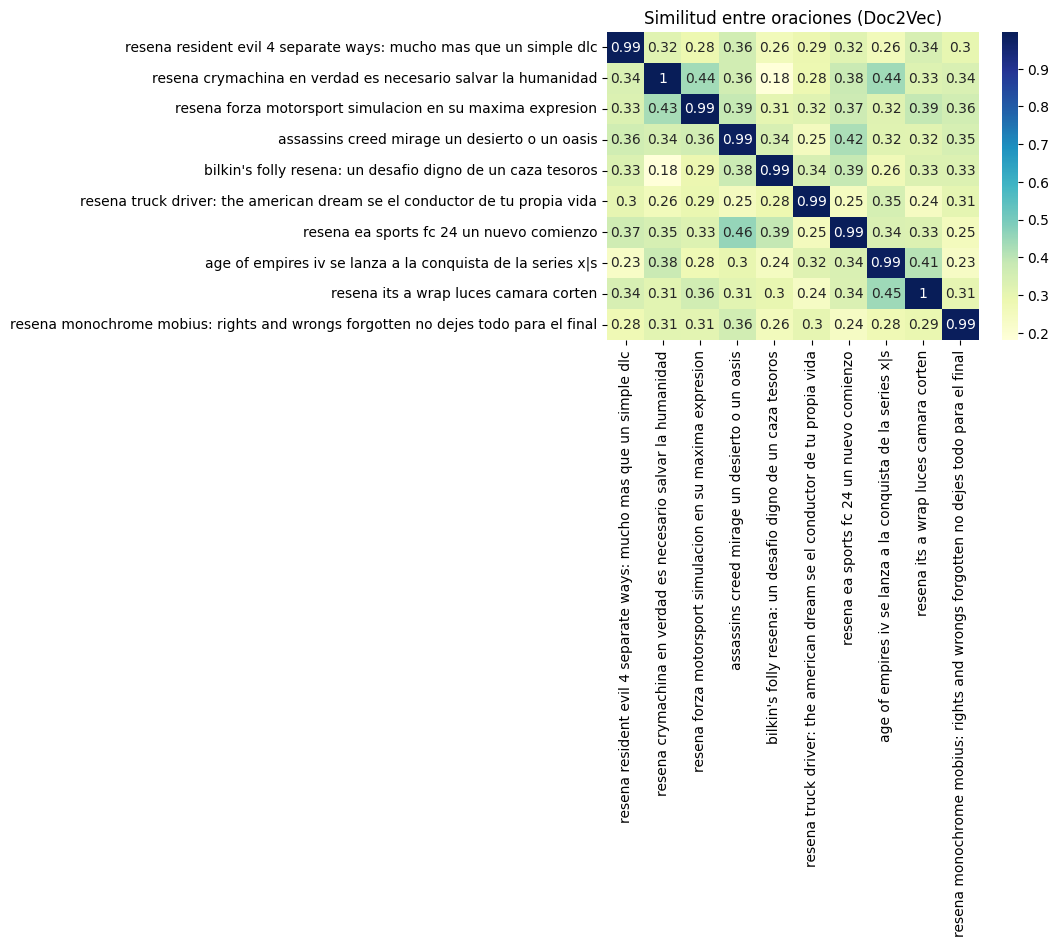

In [ ]:
# Tokenizamos los datos y los etiquetamos
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(titles_list)]

# Configuramos los parámetros para el modelo
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=1000)

# Construimos el vocabulario
model.build_vocab(tagged_data)

# Entrenamos el modelo
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

similarities_d2v = []
for i in titles_list:
    vector = model.infer_vector(word_tokenize(str(i).lower()))

    similares = model.dv.most_similar(vector) # Vemos las similitudes de cada título con todos los demás
    similarities_d2v.append(similares) # Los guardamos en una lista

# Ordenamos cada sublista según el índice de cada tupla
sorted_similarities = [sorted(sublist, key=lambda x: int(x[0])) for sublist in similarities_d2v]

# Luego separamos de cada tupla el segundo elemento de cada sublista, este representa la similitud de cada título con los demás
heatmap_similarities = [[tup[1] for tup in sublista] for sublista in sorted_similarities]

# Creamos un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_similarities, annot=True, xticklabels=titles_list, yticklabels=titles_list, cmap="YlGnBu")
plt.title("Similitud entre oraciones (Doc2Vec)")
plt.show()

#### Cuarto modelo: **Sentence-BERT (S-BERT)**

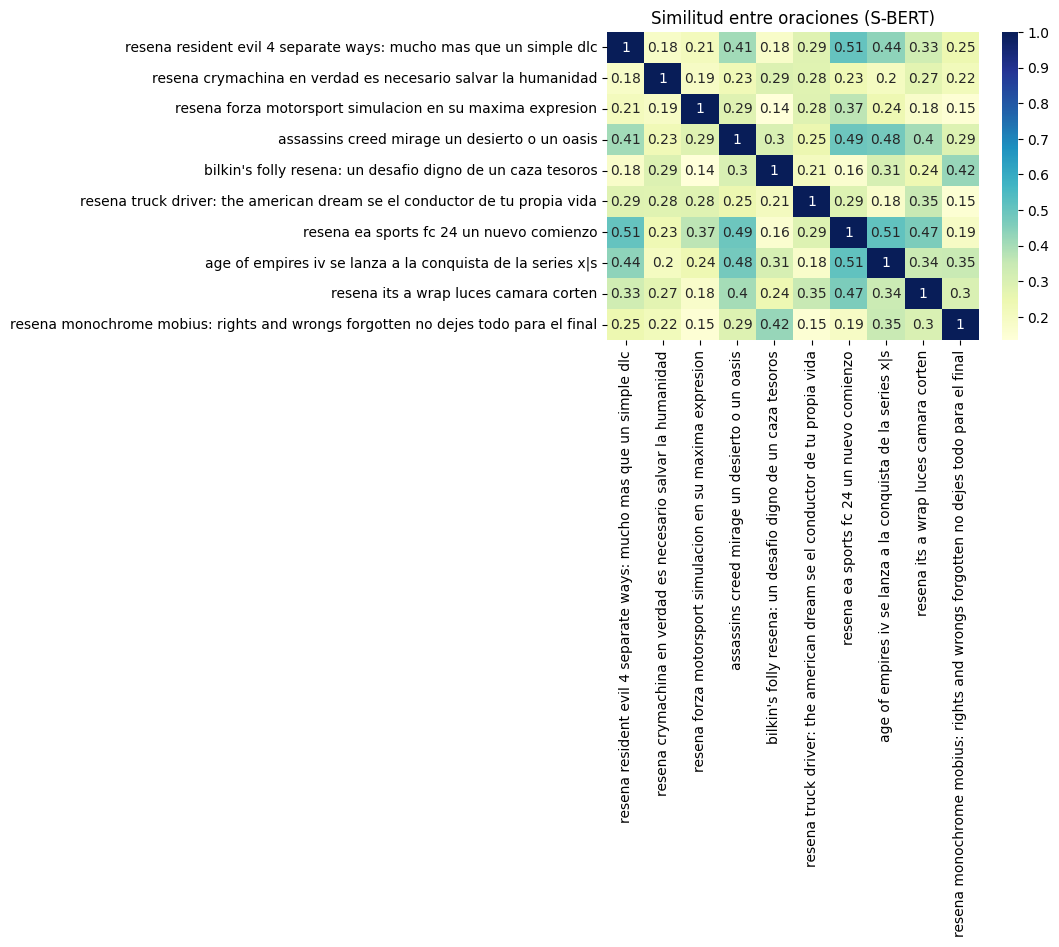

In [ ]:
# Cargamos el modelo preentrenado all-mpnet-base-v2
modelo = SentenceTransformer('all-mpnet-base-v2')

# Codificamos las oraciones
embeddings = modelo.encode(titles_list, convert_to_tensor=True)

# Calculamos las puntuaciones de similitud
cosine_scores = util.cos_sim(embeddings, embeddings)

# Creamos un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cosine_scores, annot=True, xticklabels=titles_list, yticklabels=titles_list, cmap="YlGnBu")
plt.title("Similitud entre oraciones (S-BERT)")
plt.show()

#### **Reflexiones sobre los modelos**

Cada modelo emplea diversas técnicas para analizar la semántica de cada título y determinar si son similares o no. Todos estos modelos varían en el enfoque que se le da al problema, y, en consecuencia, producen resultados diferentes. Sin embargo, al examinar todos los títulos en la categoría de videojuegos, notamos que hay numerosos títulos que siguen la estructura de 'Reseñas a...'. En otras palabras, muchos títulos comparten un tema común: la reseña de un videojuego, algunos con comentarios adicionales en el título y otros sin estos.

Para nosotros, es evidente que estos títulos son muy similares, ya que todos se centran en la misma temática y tratan sobre el acto de reseñar un videojuego siendo el comentario adicional irrelevante para la similitud en sí. Sin embargo, los modelos no logran captar esta similitud, ya que carecen de la capacidad de comprender el contexto detrás de cada título sin acceder al contenido de la noticia, a diferencia de nosotros.

## **Ejercicio 5:**
*Escriba un programa interactivo que, según la categoría seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella. Justifique la elección del modelo usado para tal fin.*

**Modelo elegido:** se eligió usar resumen extractivos con la idea de mantener el sentido original de las reseñas y no perderse de una crítica particular con el uso de las transformaciones que generan los resumenes abstractivos.

In [ ]:
#%%capture
!pip install spacy
!python -m spacy download es_core_news_md

In [ ]:
import spacy
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import textwrap
from IPython.display import HTML

In [ ]:
# Función para generar un resumen extractivo usando PageRank
def summarize(similarity_matrix, original_sentences, num_sentences=5):
    # Crear un grafo a partir de la matriz de similitud
    nx_graph = nx.from_numpy_array(similarity_matrix)
    # Aplicar PageRank al grafo
    scores = nx.pagerank(nx_graph,alpha=0.1) #MODIFIQUE EL ALFA PORQUE NO CONVERGÍA
    # Ordenar las oraciones por su puntuación y seleccionar las mejores
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(original_sentences)), reverse=True)
    return ' '.join([ranked_sentences[i][1] for i in range(num_sentences)])

def resumir(categoria):
  nlp = spacy.load('es_core_news_md')
  texto_por_categoria = archivo[archivo['categoria'] == categoria]
  texto_por_categoria.reset_index(inplace=True)

  # Lematizar y eliminar stopwords de cada oración
  resumen_global = {}
  nro_noticia = 0
  for texto in texto_por_categoria.texto:
    lemmatized_sentences = []
    original_sentences = []
    doc = nlp(texto)
    for sent in doc.sents:
        lemmatized_sentence = " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
        if lemmatized_sentence.strip() != '':  # Asegurarse de que la oración no esté vacía
            lemmatized_sentences.append(lemmatized_sentence)
            original_sentences.append(str(sent).strip())

    # Procesar las oraciones lematizadas con spaCy para obtener sus vectores
    lemmatized_docs = [nlp(sent) for sent in lemmatized_sentences]

    # Obtenemos una lista con los vectores de cada oración
    sentence_vectors = [sent.vector for sent in lemmatized_docs]

    # Crear una matriz de similitud entre las oraciones filtradas
    similarity_matrix = cosine_similarity(sentence_vectors)
    resumen = summarize(similarity_matrix, original_sentences, num_sentences=2)
    resumen_global[texto_por_categoria.titulo[nro_noticia]]=resumen
    nro_noticia += 1

  for key, values in resumen_global.items():
    html_text = f'<div style="width:100%">{values}</div>'
    print(f'{key}:')
    display(HTML(html_text))
    print()

In [ ]:
from IPython.display import clear_output

def clear_console():
    clear_output(wait=True)

def dar_resumen():
  salir = False
  while True:
      clear_console()
      categoria = int(input('Ingrese el número de la opción seleccionada: \n[1] Películas \n[2] Musica \n[3] Hoteles \n[4] Videojuegos \n\nIngrese cualquier otro valor para salir\n\n'))

      clear_console()
      if categoria == 1:
        print('---------------Resumen de la categoría películas---------------')
        resumir('peliculas')
        print('--------------------------------------------')
      elif categoria == 2:
        print('---------------Resumen de la categoría musica---------------')
        resumir('musica')
        print('--------------------------------------------')
      elif categoria == 3:
        print('---------------Resumen de la categoría hoteles---------------')
        resumir('hoteles')
        print('--------------------------------------------')
      elif categoria == 4:
        print('---------------Resumne de la categoría videojuegos--------------')
        resumir('videojuegos')
        print('--------------------------------------------')
      else:
        print('--------------------------------------------')
        print('-------Resumen de noticias finalizado-------')
        print('--------------------------------------------')
        break

      while True:
          clear_console()
          eleccion = input('\n¿Desea imprimir otro resumen? S/N\n')

          if eleccion in ['N', 'n']:
              salir = True
              break
          elif eleccion in ['S', 's']:
              print()
              break
          else: print('Opción no válida.')
      if salir: break

### **Programa interactivo para generar resumenes**

In [ ]:
dar_resumen()

## **Opcional:**
*Investigar y programar un bot de Telegram que entregue un resumen de noticias del blog de su elección. Recomendamos el uso de pyTelegramBotAPI*

[**Link del bot**](https://t.me/nlp_resumen_bot)

### **ADVERTENCIA**
Se necesita la función `summarize` del **Ejercicio 5** para funcionar.



### Librerías

Configuramos el entorno utilizando `%%capture` para evitar la sobrecarga de la consola con comandos, y procedemos a descargar todas las bibliotecas necesarias para el desarrollo de la tarea en su totalidad.

In [ ]:
# Librerías
%%capture
!pip install pyTelegramBotAPI

import pandas as pd
import telebot
import requests
from bs4 import BeautifulSoup
from telebot import types

### Funciones

#### Crear el dataframe de las noticias

In [ ]:
def df_create(news):
    # Un diccionario para almacenar el contenido de cada noticia
    news_content = {}

    # Recorremos la lista de URLs y extraemos el contenido
    for key, url in news.items():
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Encontramos los elementos que contienen el contenido de la noticia
            title = soup.find('h1', class_='a_t')
            content = soup.find('div', attrs={'data-dtm-region': 'articulo_cuerpo'})

            if content and title:
                # Seleccionamos todos los elementos <p> dentro del cuerpo de la noticia
                paragraphs = content.find_all('p')

                # Texto completo del contenido de la noticia
                news_article_content = ' '.join(paragraph.text for paragraph in paragraphs)
                news_content[title.text] = news_article_content
            else:
                news_content[title.text] = "No se pudo encontrar el contenido de esta noticia."

    return pd.DataFrame(list(news_content.items()), columns=['title', 'content'])

#### Resumir noticia

In [ ]:
def summarize_news(title, df):
    nlp = spacy.load('es_core_news_md')
    contenido = df[df['title'] == title]['content'].values[0]

    # Lematizar y eliminar stopwords de cada oración
    lemmatized_sentences = []
    original_sentences = []
    doc = nlp(contenido)

    for sent in doc.sents:
        lemmatized_sentence = " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
        if lemmatized_sentence.strip() != '':  # Asegurarse de que la oración no esté vacía
            lemmatized_sentences.append(lemmatized_sentence)
            original_sentences.append(str(sent).strip())

    # Procesar las oraciones lematizadas con spaCy para obtener sus vectores
    lemmatized_docs = [nlp(sent) for sent in lemmatized_sentences]

    # Obtenemos una lista con los vectores de cada oración
    sentence_vectors = [sent.vector for sent in lemmatized_docs]

    # Crear una matriz de similitud entre las oraciones filtradas
    similarity_matrix = cosine_similarity(sentence_vectors)
    summary = summarize(similarity_matrix, original_sentences, num_sentences=2)

    return summary

### Variables

In [ ]:
# Diccionario con las url de las noticias
news = {
    0: 'https://elpais.com/babelia/2023-09-23/la-escritura-como-exoesqueleto.html',
    1: 'https://elpais.com/educacion/escuelas-en-red/2023-09-17/una-educacion-grande-en-un-pueblo-pequeno.html',
    2: 'https://elpais.com/cultura/del-tirador-a-la-ciudad/2023-08-01/existe-un-mundo-mejor-pero-es-mas-caro.html',
    3: 'https://elpais.com/cultura/del-tirador-a-la-ciudad/2023-07-11/hacer-hueco-a-los-estudiantes-para-cambiar-la-ciudad.html',
    4: 'https://elpais.com/cultura/del-tirador-a-la-ciudad/2023-07-05/sonar-con-una-piscina.html',
    5: 'https://elpais.com/mamas-papas/expertos/2023-07-04/carmen-osorio-periodista-es-dificil-que-a-los-ninos-no-les-afecten-las-opiniones-de-otros-y-las-vidas-idilicas-que-ven-en-internet.html',
    6: 'https://elpais.com/elviajero/viajero-astuto/2023-06-30/viajes-de-una-vida.html',
    7: 'https://elpais.com/elviajero/2023-06-26/guia-para-viajar-a-singapur-con-ninos-consejos-para-llegar-y-atracciones-imprescindibles.html',
    8: 'https://elpais.com/educacion/escuelas-en-red/2023-06-25/mirando-al-mundo-con-curiosidad.html',
    9: 'https://elpais.com/educacion/2023-06-11/el-instituto-de-torrejoncillo-abre-su-pinacoteca-al-publico.html',
    10: 'https://elpais.com/opinion/2023-06-07/no-se-venden-bajos.html',
    11: 'https://elpais.com/television/2023-06-05/pescar-datos-en-un-mar-de-documentacion.html',
    12: 'https://elpais.com/elviajero/2023-05-20/consejos-de-un-trotamundos-para-solucionar-los-imprevistos-que-surgen-al-viajar.html',
    13: 'https://elpais.com/elviajero/viajes-paco-nadal/2023-03-28/tienes-un-movil-de-miles-de-megapixeles-pero-sabes-hacer-buenas-fotos-de-tus-viajes.html',
    14: 'https://elpais.com/elviajero/2023-03-25/claves-para-hacer-la-maleta-de-los-ninos-para-irse-de-viaje.html',
    15: 'https://elpais.com/elviajero/viajero-astuto/2023-03-21/todo-el-mundo-cabe-en-un-huerto-de-la-region-del-loira.html',
    16: 'https://elpais.com/planeta-futuro/escuelas-en-red/2023-03-19/profesores-que-apuestan-por-mejorar-la-calidad-de-la-ensenanza.html',
    17: 'https://elpais.com/elviajero/gastronotas-de-capel/2023-03-04/de-verdad-existen-los-espaguetis-a-la-bolonesa.html',
    18: 'https://elpais.com/elviajero/viajes-paco-nadal/2023-03-01/skrei-pescando-en-el-artico-noruego-el-bacalao-mas-viajero.html',
    19: 'https://elpais.com/elviajero/gastronotas-de-capel/2023-02-26/llega-el-momento-de-las-galeras-un-marisco-tan-feo-como-sabroso-estrena-temporada.html',
}

# Dataframe de las noticias. Primera columna: 'title', segunda columna: 'content'
news_dataframe = df_create(news)

### Ejecución del bot

In [ ]:
# Token de acceso del bot
bot_token = '6351031143:AAGW5Oyax3ubR1bxwn-Xug3ELUyJ7VnaSmU'

# Guardamos todos los titulos en una lista
titles = news_dataframe['title'].values.tolist()

# Inicializamos el bot
bot = telebot.TeleBot(bot_token)

# Mensaje de bienvenida
@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    bot.reply_to(message, "¡Bienvenido a tu bot de noticias! Envía /news para recibir un resumen de noticias.")

# Mandamos la lista de noticias
@bot.message_handler(commands=['news'])
def send_news_summary(message):
    # Creamos un mensaje con los títulos de las noticias
    user_message = "Elige una noticia:\n\n"
    for i, title in enumerate(titles, 1):
        user_message += f"{i}. {title}\n"

    # Enviamos el mensaje al usuario
    bot.send_message(message.chat.id, user_message)

# Manejamos la elección del usuario
@bot.message_handler(func=lambda message: True)
def handle_user_choice(message):
    try:
        # Convertimos el mensaje del usuario en un número
        election = int(message.text)

        # Verificamos si la elección es válida
        if 1 <= election <= len(titles):
            # Obtenemos el título de la noticia seleccionada
            selected_title = titles[election - 1]

            # Con el título seleccionado obtenemos el resumen de esa noticia con la función 'summarize_news'
            summary = summarize_news(selected_title, news_dataframe)
            bot.send_message(message.chat.id, f"Resumen de '{selected_title}':\n{summary}")
        else:
            bot.send_message(message.chat.id, "Selección no válida. Por favor, ingresa un número válido.")
    except ValueError:
        bot.send_message(message.chat.id, "Por favor, ingresa un número válido para elegir una noticia.")

# Ejecuta el bot
bot.polling()